# Question 5

Numerically solve the perturbation equations for a matter component with $w = \delta p = \sigma = 0$, where $w$ is the equation of state parameter, $\delta p$ the pressure perturbation and $\sigma$ the anisotropic stress.
Assume a $\Lambda CDM$ model with $\Omega_{r,0} = 10^{-4}$ and $\Omega_{m,0} = 0.3$.

Plot your results for $10^{-4} \leq a \leq 1$ and four different scales: $k = 10^{-3}H_0, k = 10^{-1}H_0, k = H_0,$ and $
k = 50H_0$. Consider $H_0 = 67 Km/(sMpc)$


In [29]:
#first we import all the important libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import camb


In [30]:
plt.rcParams['font.family'] = 'DejaVu serif'

In [31]:
H0 = 67 # km/s/Mpc
omega_m = 0.3
omega_r=1e-4
omega_de=1-omega_r-omega_r #we assume k = 0

delta_de=10**-3

In [32]:
def EDO(vect,a ,k):
    delta=vect[0]
    theta=vect[1]

    H=H0*np.sqrt(omega_m*a**-3 + omega_r*a**-4 + omega_de)

    equation = np.array([-(2*k**2+9*a**2*H**2)**-1 *(2*k**2*theta/(a**2*H) - 27/2*a**3*H**2/k**2*(theta/a + 3/2*H*(delta+ 3*theta/k**2*a*H)+ delta_de)),-theta/a - 3/2 *H *((delta + 3*theta/k**2*a*H) + delta_de)])
    return equation

delta_0 = 1e-3
theta_0 = 0

res = np.array([delta_0, theta_0])

a = np.linspace(1e-4, 1, 1000)

#the different k´s
k1 = H0 * 1e-3
k2 = H0 * 1e-1
k3 = H0
k4 = 50 * H0

sol1 = odeint(EDO,res, t=a,args=(k1,))
sol2 = odeint(EDO,res, t=a,args=(k2,))
sol3 = odeint(EDO,res, t=a,args=(k3,))
sol4 = odeint(EDO,res, t=a,args=(k4,))


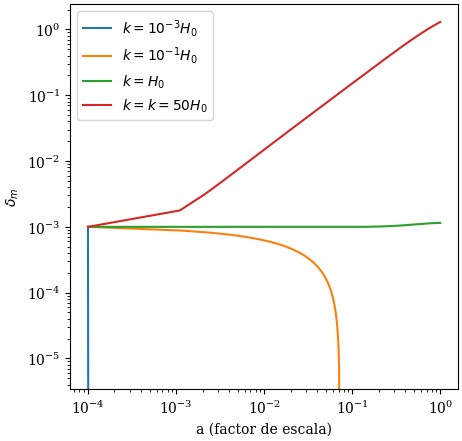

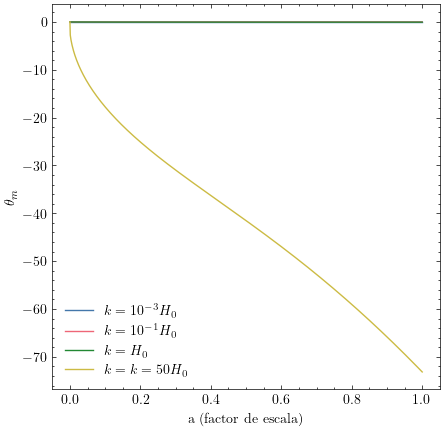

In [33]:
#plot...
plt.figure(figsize=(5,5))
plt.loglog(a, sol1[:,0], label='$k = 10^{-3}H_0$')
plt.loglog(a, sol2[:,0], label='$k = 10^{-1}H_0$')
plt.loglog(a, sol3[:,0], label='$k=H_0$')
plt.loglog(a, sol4[:,0], label='$k=k = 50H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel('$\delta_m$')
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

plt.figure(figsize=(5,5))
plt.plot(a, sol1[:,1], label='$k = 10^{-3}H_0$')
plt.plot(a, sol2[:,1], label='$k = 10^{-1}H_0$')
plt.plot(a, sol3[:,1], label='$k=H_0$')
plt.plot(a, sol4[:,1], label='$k=k = 50H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel(r'$\theta_m$')
plt.legend()
plt.show()

# Question 6

# part a
Compute the matter power spectrum at different redshift. Then, manually set the density of massive neutrinos to zero.

In [34]:
#we set the cosmology 
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [35]:
#redshift
zmax= 1000
zmin= 0
redshifts = np.arange(zmin, zmax, zmax//5)

#matter power spectrum
pars.set_matter_power(redshifts = redshifts, kmax = 1)
results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


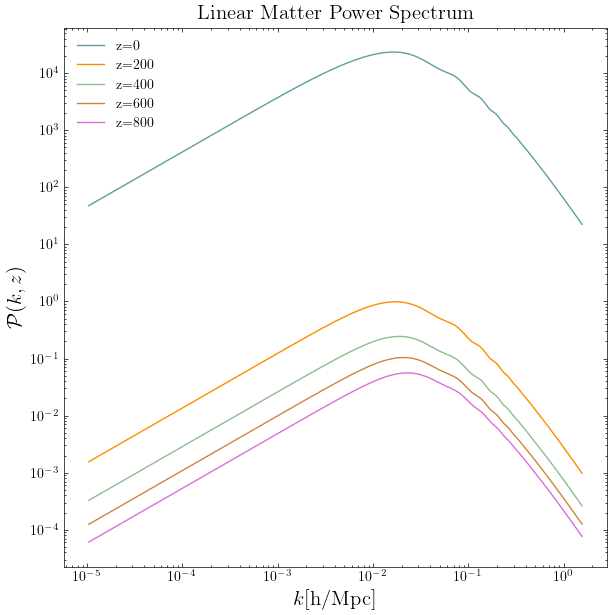

In [36]:
kh, z, Pk = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)

#plot
plt.figure(figsize=(7,7))
plt.loglog(kh,Pk[0,:],label='z=' + str(redshifts[0]), color = 'cadetblue')
plt.loglog(kh,Pk[1,:],label='z=' + str(redshifts[1]), color = 'darkorange')
plt.loglog(kh,Pk[2,:],label='z=' + str(redshifts[2]), color = "darkseagreen")
plt.loglog(kh,Pk[3,:],label='z=' + str(redshifts[3]), color = "peru")
plt.loglog(kh,Pk[4,:],label='z=' + str(redshifts[4]), color = "orchid")
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

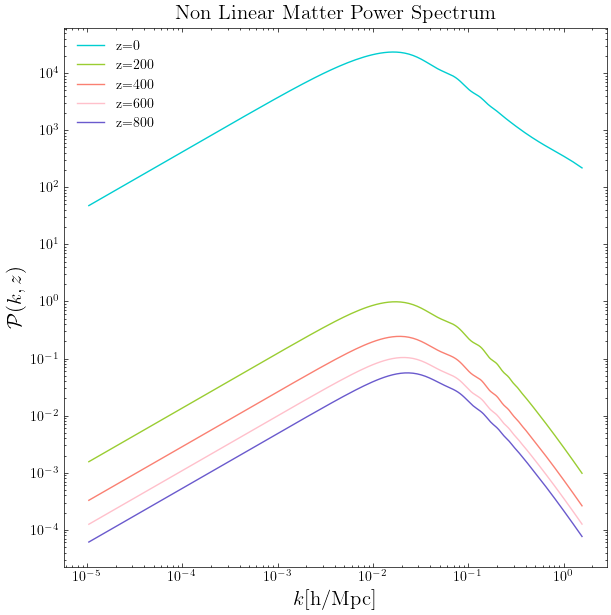

In [37]:
#non linear matter power spectrum
khnl, znl, PKnl=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnl,PKnl[0,:],label='z=' + str(redshifts[0]), color = 'darkturquoise')
plt.loglog(khnl,PKnl[1,:],label='z=' + str(redshifts[1]), color = 'yellowgreen')
plt.loglog(khnl,PKnl[2,:],label='z=' + str(redshifts[2]), color = 'salmon')
plt.loglog(khnl,PKnl[3,:],label='z=' + str(redshifts[3]), color = 'pink')
plt.loglog(khnl,PKnl[4,:],label='z=' + str(redshifts[4]), color = 'slateblue')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

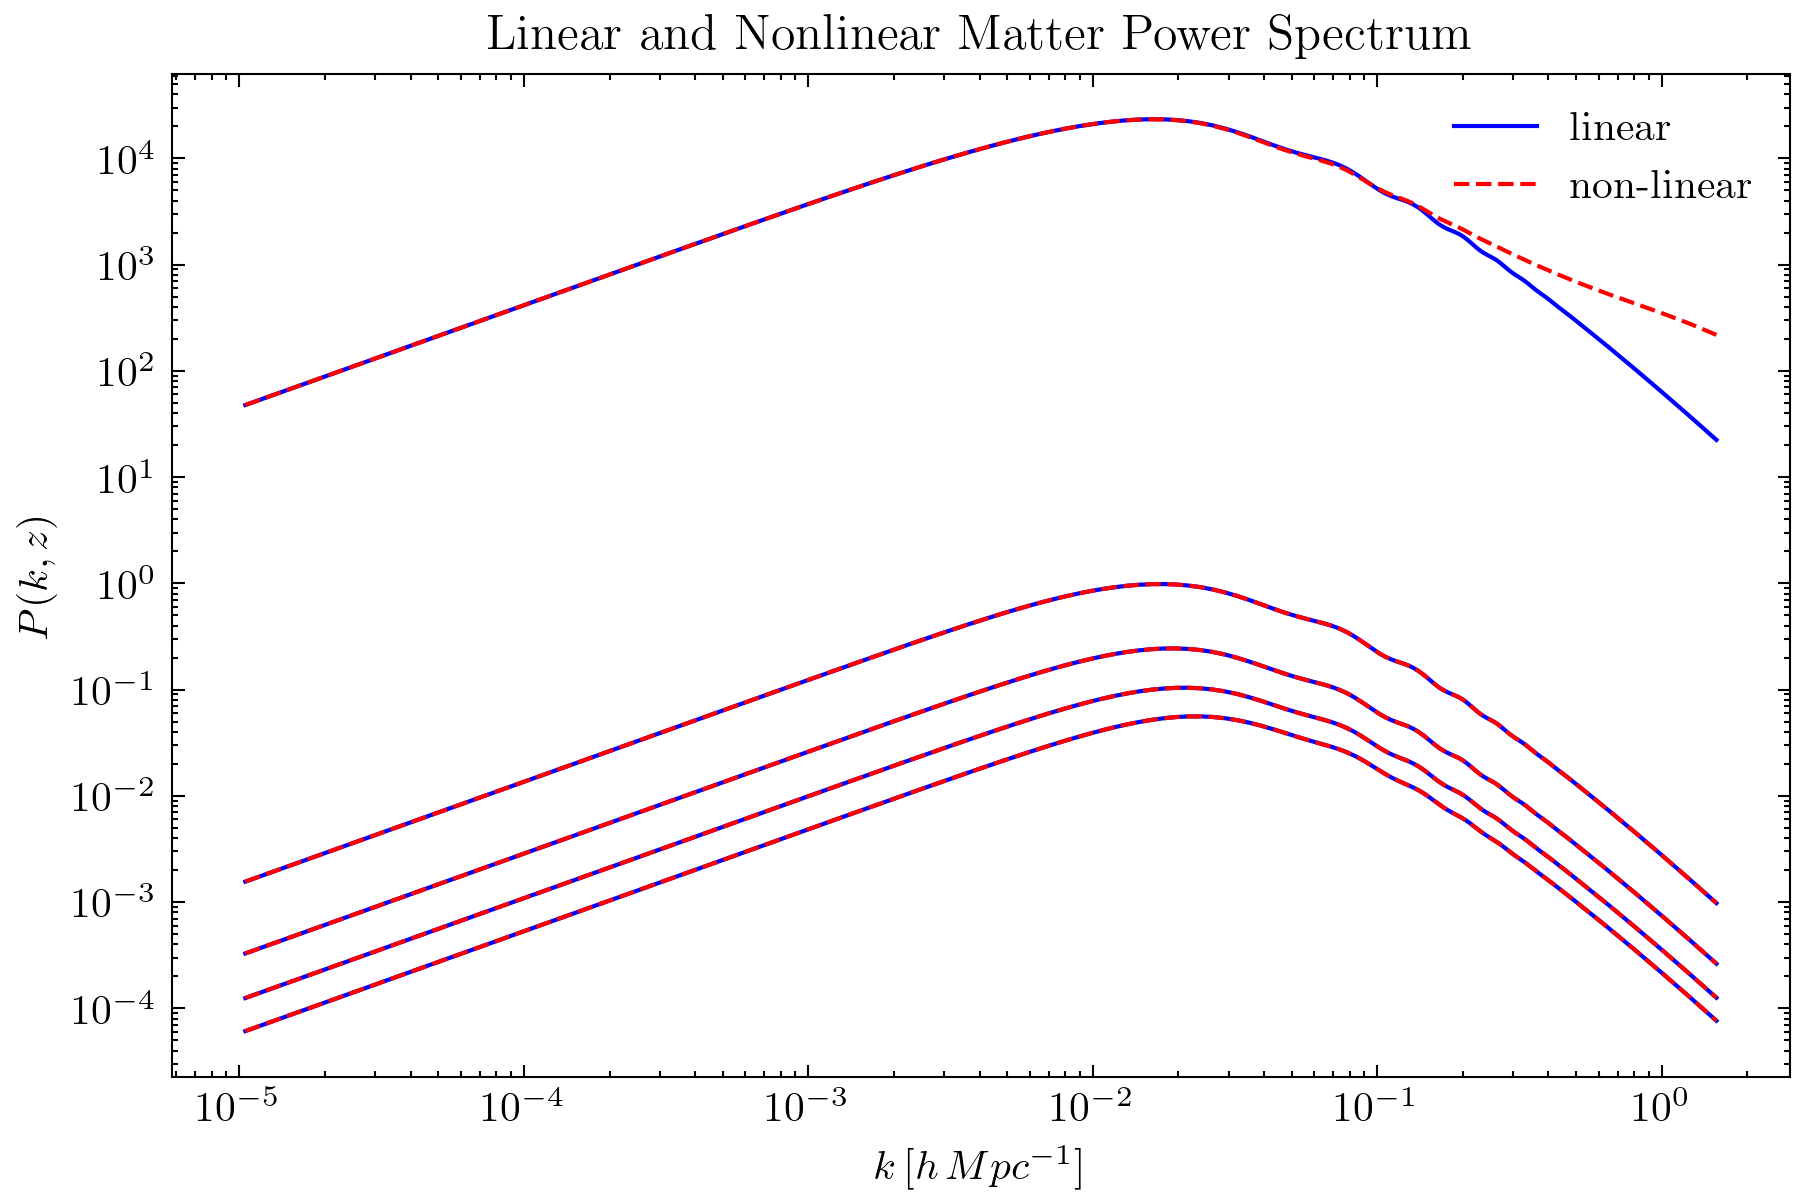

In [38]:
#we compare them 
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

for z in range(len(redshifts)):
    ax.loglog(kh, Pk[z,:], color = 'b')
    ax.loglog(khnl, PKnl[z,:], '--', color = 'r' )

ax.legend(['linear', 'non-linear'], loc='upper right')
ax.set_title('Linear and Nonlinear Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P(k,z)$')

plt.show()

In [39]:
#nu = 0
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0, num_massive_neutrinos=0) # Omega_nu=0

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.0
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 3.044
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 0.0
   nrunrun = 0.0
   nt = -0.0
   ntrun = -0.0
  

In [40]:
z_max=1000
z_min=0

redshifts=np.arange(z_min,z_max,z_max//5)

pars.set_matter_power(redshifts=redshifts, kmax=1)  

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


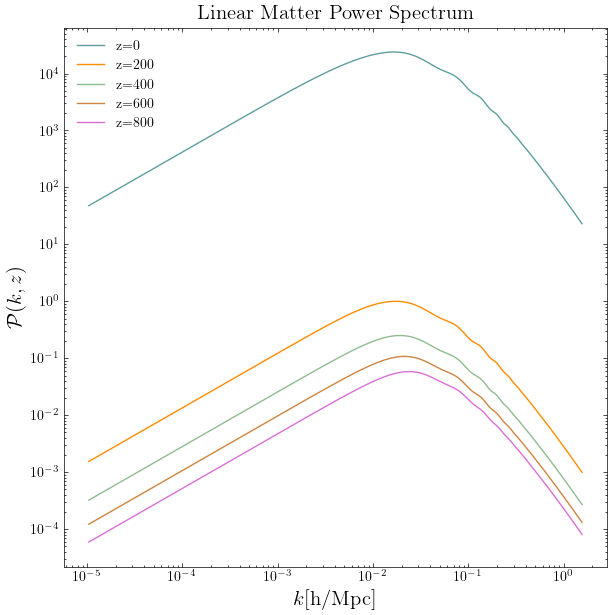

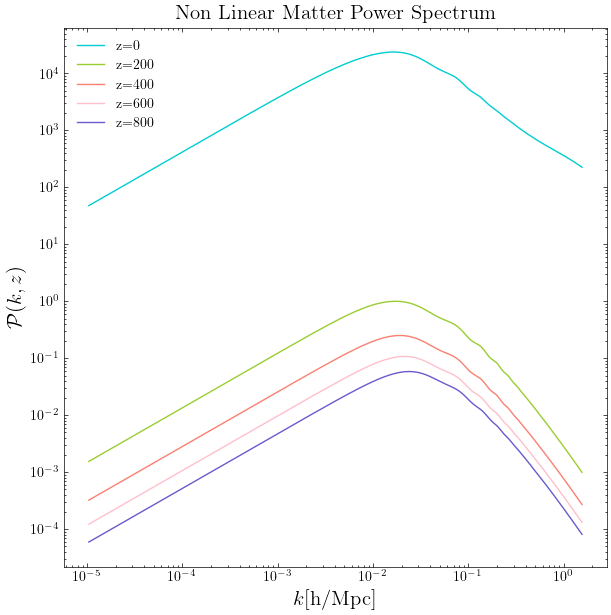

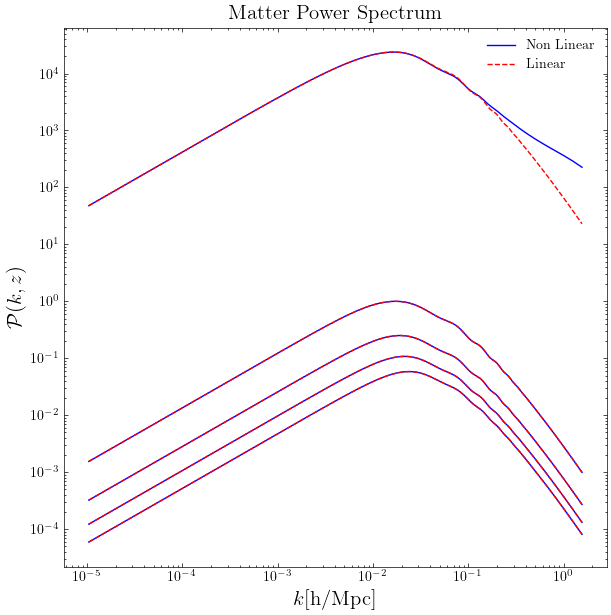

In [41]:
#plot the lineal, non lineal and then compare them.

#lineal
khn, zn, PKn=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(7,7))
plt.loglog(khn,PKn[0,:],label='z=' + str(redshifts[0]), color = "cadetblue")
plt.loglog(khn,PKn[1,:],label='z=' + str(redshifts[1]), color = "darkorange")
plt.loglog(khn,PKn[2,:],label='z=' + str(redshifts[2]), color = "darkseagreen")
plt.loglog(khn,PKn[3,:],label='z=' + str(redshifts[3]), color = "peru")
plt.loglog(khn,PKn[4,:],label='z=' + str(redshifts[4]), color = "orchid")
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

#nonlineal

khnln, znln, PKnln=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:],label='z=' + str(redshifts[0]), color = "darkturquoise")
plt.loglog(khnln,PKnln[1,:],label='z=' + str(redshifts[1]), color = "yellowgreen")
plt.loglog(khnln,PKnln[2,:],label='z=' + str(redshifts[2]), color = "salmon")
plt.loglog(khnln,PKnln[3,:],label='z=' + str(redshifts[3]), color = "pink")
plt.loglog(khnln,PKnln[4,:],label='z=' + str(redshifts[4]), color = "slateblue")
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

#comparison

plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:],label='Non Linear',c='blue')
plt.loglog(khnln,PKnln[1,:],c='blue')
plt.loglog(khnln,PKnln[2,:],c='blue')
plt.loglog(khnln,PKnln[3,:],c='blue')
plt.loglog(khnln,PKnln[4,:],c='blue')
plt.loglog(khn,PKn[0,:],c='red' ,linestyle='dashed', label='Linear')
plt.loglog(khn,PKn[1,:],c='red' ,linestyle='dashed')
plt.loglog(khn,PKn[2,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[3,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[4,:],c='red',linestyle='dashed')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

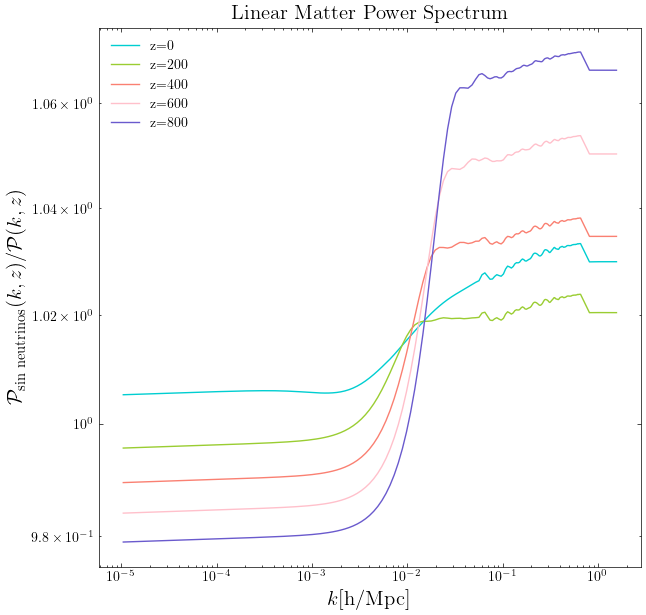

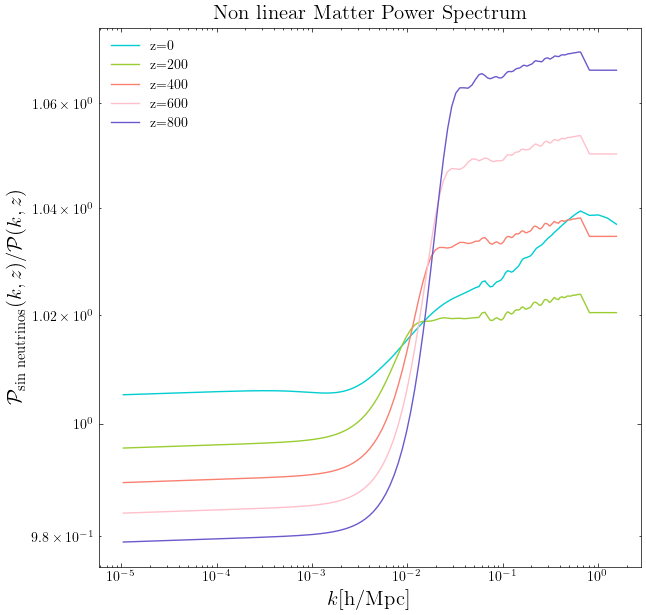

In [42]:
plt.figure(figsize=(7,7))
plt.loglog(khn,PKn[0,:]/Pk[0,:],label='z=' + str(redshifts[0]), color = "darkturquoise")
plt.loglog(khn,PKn[1,:]/Pk[1,:],label='z=' + str(redshifts[1]), color = "yellowgreen")
plt.loglog(khn,PKn[2,:]/Pk[2,:],label='z=' + str(redshifts[2]), color = "salmon")
plt.loglog(khn,PKn[3,:]/Pk[3,:],label='z=' + str(redshifts[3]), color = "pink")
plt.loglog(khn,PKn[4,:]/Pk[4,:],label='z=' + str(redshifts[4]), color = "slateblue")
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:]/PKnl[0,:],label='z=' + str(redshifts[0]), color = "darkturquoise")
plt.loglog(khnln,PKnln[1,:]/PKnl[1,:],label='z=' + str(redshifts[1]), color = "yellowgreen")
plt.loglog(khnln,PKnln[2,:]/PKnl[2,:],label='z=' + str(redshifts[2]), color = "salmon")
plt.loglog(khnln,PKnln[3,:]/PKnl[3,:],label='z=' + str(redshifts[3]), color = "pink")
plt.loglog(khnln,PKnln[4,:]/PKnl[4,:],label='z=' + str(redshifts[4]), color = "slateblue")
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.show()

It can be notice that the effect of the massive neutrinos in the matter power spectrum is more important in the smaller scales (larger k values). Also, the effect it is intensified as the redshift takes larger values. 

The reason for this is that the neutrinos, after decoupling from the termic bath, can escape from high density regions to low density regions. This weakens gravitational potential wells which suppresses structure formation. 


# part b
Compute the TT angular power spectrum. Then, explore different cosmological parameters and explain the differences in the results. Give at least one compelling example and its justification


In [43]:
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054
omk=0
pars = camb.CAMBparams()

#we are going to change the curvatures

#omk= omk-0.7
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk-0.07, tau=tau)
powers1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL1=powers1['unlensed_scalar']

#omk= omk - 0.03
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk -0.03, tau=tau)
powers2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL2=powers2['unlensed_scalar']

#omk=omk-0
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk , tau=tau)
powers3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL3=powers3['unlensed_scalar']

#omk=omk+0.03
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk +0.03, tau=tau)
powers4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL4=powers4['unlensed_scalar']

#omk=omk+0.03
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk +0.07, tau=tau)
powers5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL5=powers5['unlensed_scalar']


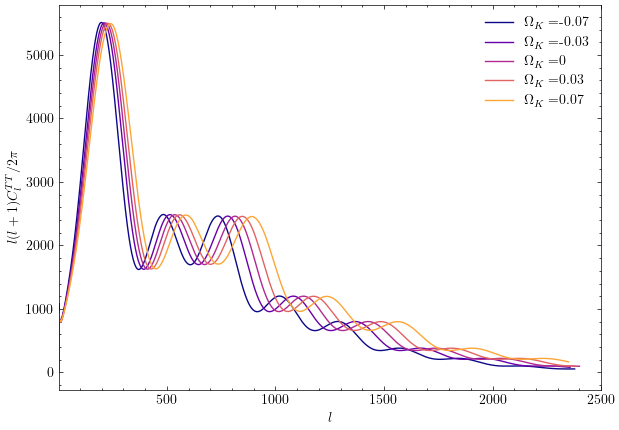

In [44]:

ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])
colors = ['#0d0887',  # violeta profundo
          '#6a00a8',  # púrpura
          '#b12a90',  # magenta rosado
          '#e16462',  # naranja-rosado
          '#fca636']  # amarillo-anaranjado

plt.figure(figsize=(7,5))
plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_K=$' + str(omk-0.07))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_K=$' + str(omk-0.03))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_K=$' + str(omk))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_K=$' + str(omk+0.03))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_K=$' + str(omk+0.07))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()

The position of the peaks changes as the curvature parameter changes. It moves to the right as tha parameter increases. 

This makes sense due to the meaning of the parameter of curvature. As the parameter grows the universe it is "more open", in the sense that the geodesics diverge.

In [45]:
#now we modify the ombh

#ombh2=omega_bh2-0.004
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.004, omch2=omega_ch2, omk=omk, tau=tau)
powers1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL1=powers1['unlensed_scalar']

#ombh2=omega_bh2-0.01
pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.01, omch2=omega_ch2, omk=omk, tau=tau)
powers2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL2=powers2['unlensed_scalar']

#ombh2=omega_bh2
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk, tau=tau)
powers3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL3=powers3['unlensed_scalar']

#ombh2=omega_bh2+0.005
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.005, omch2=omega_ch2, omk=omk, tau=tau)
powers4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL4=powers4['unlensed_scalar']

#ombh2=omega_bh2+0.01
pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.01, omch2=omega_ch2, omk=omk, tau=tau)
powers5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')
unlensedCL5=powers5['unlensed_scalar']


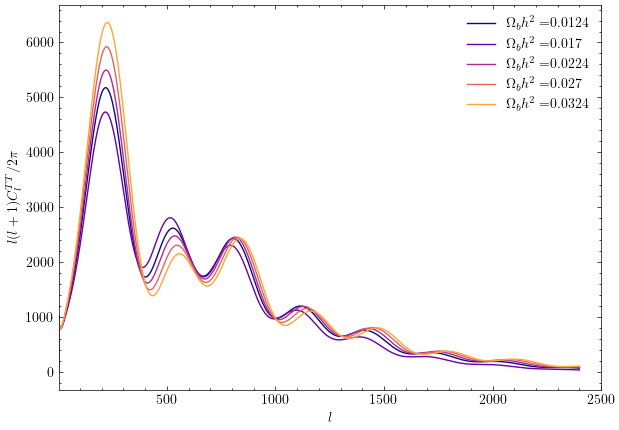

In [46]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ['#0d0887',  # violeta profundo
          '#6a00a8',  # púrpura
          '#b12a90',  # magenta rosado
          '#e16462',  # naranja-rosado
          '#fca636']  # amarillo-anaranjado

plt.figure(figsize=(7,5))

plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_bh^2=$' + str(omega_bh2-0.01))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_bh^2=$' + str(round(omega_bh2-0.005,3)))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_bh^2=$' + str(omega_bh2))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_bh^2=$' + str(round(omega_bh2+0.005,3)))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_bh^2=$' + str(omega_bh2+0.01))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()

It can be notice that, as the baryons changes, the peaks change in position, moving them to the right, to smaller angular scales.
This is due to changes in the sound horizon.

Also, the height of each peak it is altered. This because higher baryon density enhances gravitational compression. 